### 추세 지속 일수 분석

In [1]:
%matplotlib inline
import sys, os
sys.path.append('../..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
import h5py

In [2]:
path = os.path.join('..','..','data','trend index','trend_index.hdf')
file = h5py.File(path, mode='r')

최장 지속일: 166일
평균 지속일: 14.1일


Text(0.5, 1.0, 'UP Trend')

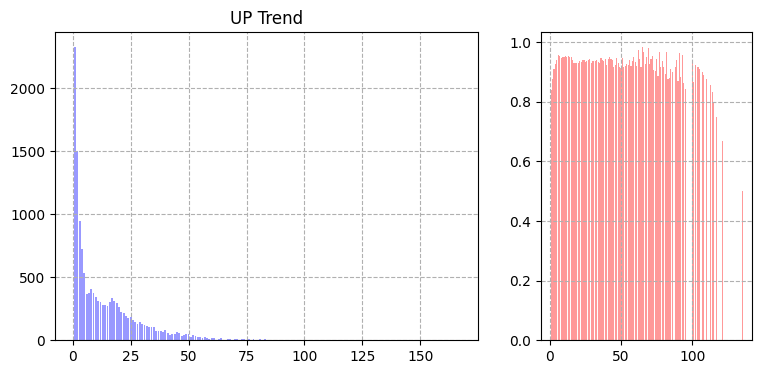

In [322]:
# 추세기준값 설정
index = 0.6
uptrend = []
for data in file.values():
    uptrend.append(data['trend50'][:,2])

uptrend = np.concatenate(uptrend)
uptrend[uptrend < index] = 0
uptrend[uptrend >= index] = 1
uptrend = uptrend.astype('int')

# 연속된 값사이의 차가 1이거나 (0에서 1로 바뀜)
# -1 (1에서 0으로 바뀜) 인 곳의 인덱스를 기준으로 split 함
diff = np.diff(uptrend) 
idx = np.where( (diff==1) | (diff==-1))[0]+1
ups = np.split(uptrend, idx)

# 쪼개진 각 어레이들의 합 (연속일수) 을 구하고 카운트
counter = Counter(sorted([sum(i) for i in ups]))
days = []
cnt = []
for k,v in counter.items():
    days.append(k)
    cnt.append(v)
# 조건부 확률 P(내일도 지속| 오늘 지속)
days = np.array(days[1:])
cnt = np.array(cnt[1:])
cond_prob = [ sum(cnt[x+1:]) / sum(cnt[x:]) for x in range(len(cnt)-1)]

print(f"최장 지속일: {days[-1]}일")
print(f"평균 지속일: {np.average(days, weights=cnt).round(1)}일")

# 그래프
f, (ax) = plt.subplots(1,2, figsize=(9,4), gridspec_kw={'width_ratios':[2, 1]} )
ax[0].bar(days, cnt, color='#9999ff')
ax[1].bar(days[:-1], cond_prob, color='#ff9999')

#exponential distribution
#expup = cnt[0] * np.exp(-(days-1))

#ax[0].plot(days, expup, linestyle='--', color='red')

for axe in f.get_axes():
    axe.grid(linestyle='--')
ax[0].set_title("UP Trend")


In [33]:
from tools.instruments import instruments
from tools.quotes import Quotes
from tools.display import highchart

In [8]:
q=instruments['AD'].quotes(fields='ohlcv')

In [ ]:
highchart([
    'data':
])

<Axes: >

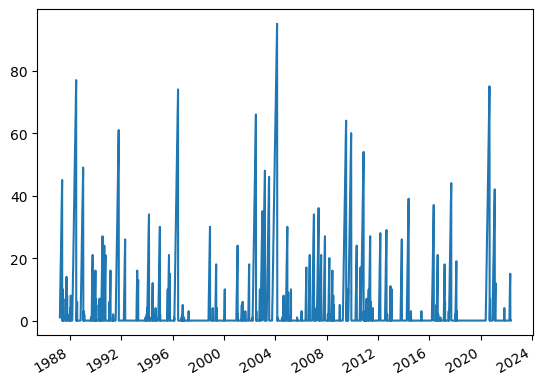

In [10]:
q.TREND(period=50, direction='up', threshold=0.7).plot()